In [6]:
import numpy as np

import matplotlib.pyplot as plt
from scipy.optimize import minimize
%matplotlib inline

# Задание

Допишите реализацию класса для обучения полиномиальной регресии, то есть по точкам $x_1, x_2, \dots, x_n$ и $y_1, y_2, \dots, y_n$ и заданному числу $d$ решить оптимизационную задачу:

$$ \sum_{i=1}^n (~f(x_i) - y_i~)^2 \min_f,$$ где f – полином степени не выше $d$.

**Примечание:** в этом задании оптимизационную задачу можно решать как с помощью scipy.optimize, так и сводя задачу к линейной регрессии и используя готовую формулу весов из нее. Предпочтительней второй путь, но первый вариант проще, и его можно использовать для проверки. Независимо от того, как вы решите эту задачу, сдавайте в форму ответ, в котором будете больше всего уверенны.

**Предупреждение:** проверка этого задания **не предполагает**, что вы решите его с помощью SGD, т.к. получить таким способом тот же ответ *очень* сложно.

In [171]:
class PolynomialRegression(object):
    
    def __init__(self, max_degree=1):
        self.max_degree = max_degree
        
    def _polynom(self, weights, x):
        return sum([weights[i] * x**i for i in range(len(weights))])
    
    def _error(self, weights, X, Y):
        return sum([(self._polynom(weights, x) - y)**2 for x, y in zip(X, Y)])
        
        
    def fit(self, points_x, points_y):
        # insert your code here to fit the model
        
        self.weights = minimize(self._error, np.ones(self.max_degree+1), (points_x, points_y)).x
        
        return self
    
    def predict(self, points_x):
        # insert your code here to predict the values
        return np.array([self._polynom(self.weights, x) for x in points_x])

In [177]:
np.random.seed(42)
points_x = np.random.uniform(-10, 10, size=10)
# we use list comprehesion but think about how to write it using np.array operations
points_y = np.array([4 - x + x ** 2 + 0.1 * x ** 3 + np.random.uniform(-20, 20) for x in points_x])

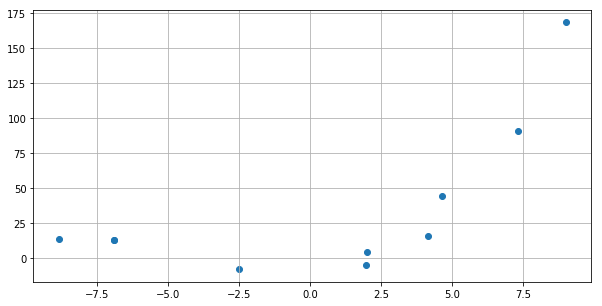

In [178]:
plt.figure(figsize=(10, 5))
plt.scatter(points_x, points_y)
plt.grid()
plt.show()

In [179]:
def plot_model(max_degree):
    plt.figure(figsize=(10, 5))
    plt.scatter(points_x, points_y)
    model = PolynomialRegression(max_degree).fit(points_x, points_y)
    all_x = np.arange(-10, 10.1, 0.1)
    plt.plot(all_x, model.predict(all_x))
    plt.grid()
    plt.show()

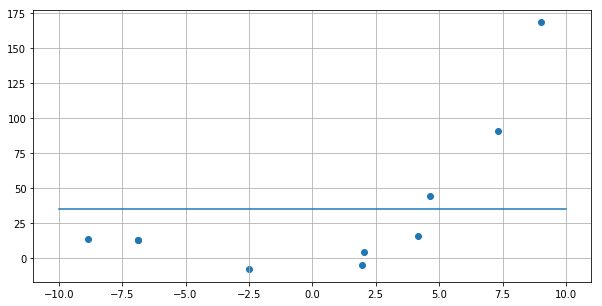

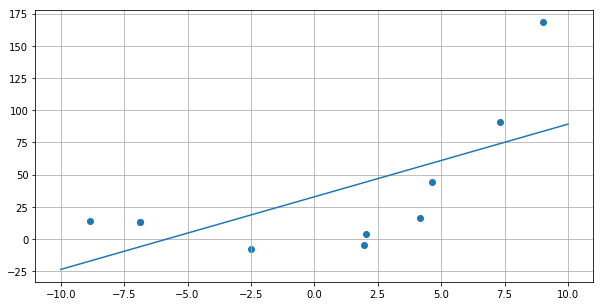

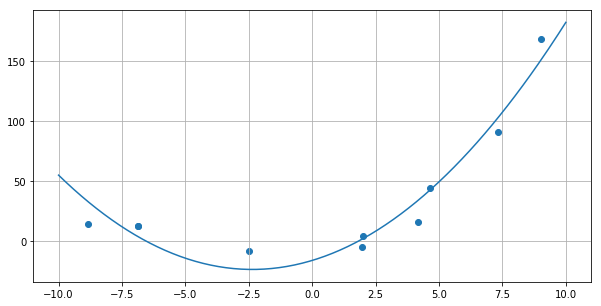

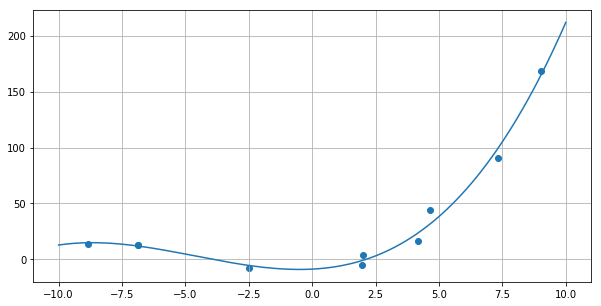

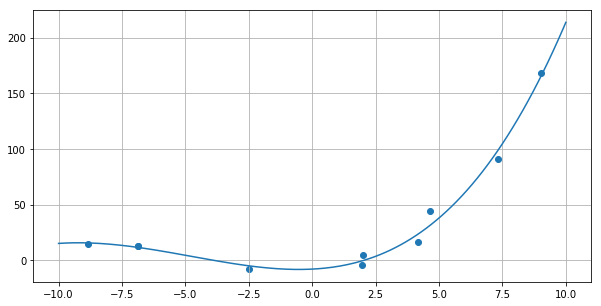

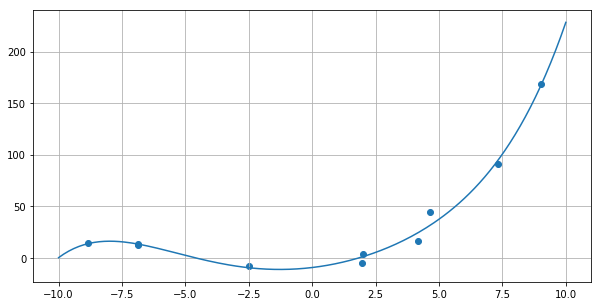

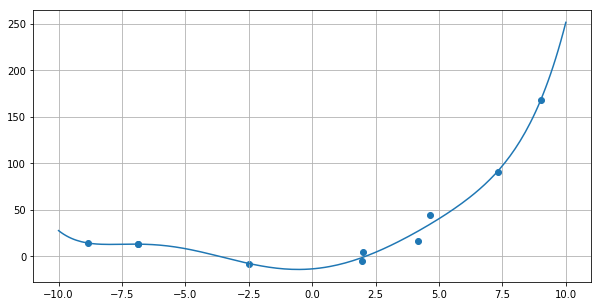

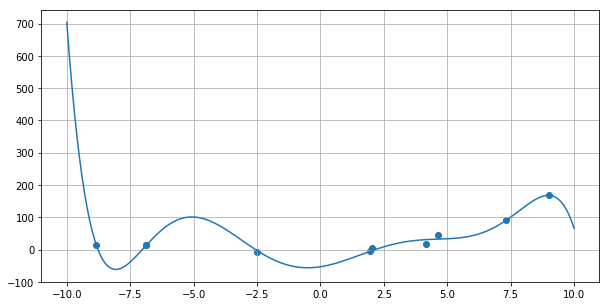

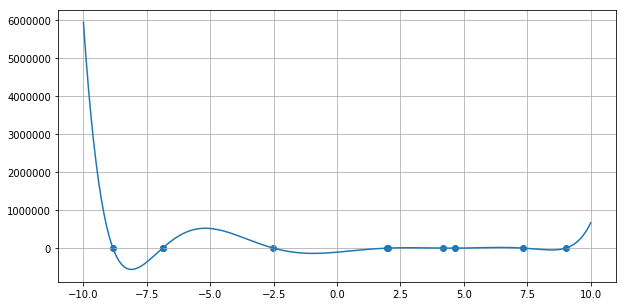

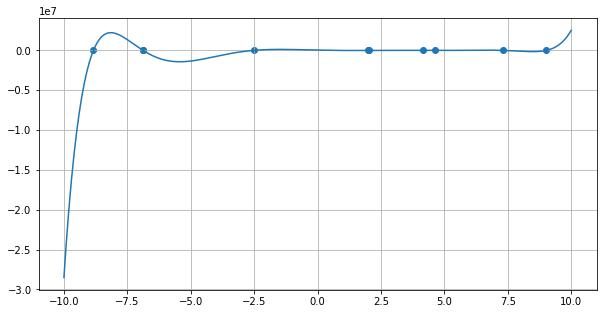

In [180]:
for i in range(10):
    plot_model(i)

Объясните почему графики меняются таким образом

**Значение для формы**

In [176]:
print(int(
    PolynomialRegression(7).fit(points_x, points_y).predict([10])[0]
    + PolynomialRegression(1).fit(points_x, points_y).predict([-5])[0]
    + PolynomialRegression(4).fit(points_x, points_y).predict([-15])[0]
))

45
